In [209]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [210]:
data_folder = "./data/GBD_data/"
saving_folder = "./data/Cleaned_GBD_data/"
file_list = [i for i in sorted(os.listdir(data_folder)) if 'IHME-GBD' in i]

In [6]:
pdfs = []
for file in file_list:
    print("Reading {} ...".format(file))
    pdfs.append(pd.read_csv(data_folder + file))

Reading IHME-GBD_2017_DATA-302bab91-1.csv ...
Reading IHME-GBD_2017_DATA-302bab91-10.csv ...
Reading IHME-GBD_2017_DATA-302bab91-11.csv ...
Reading IHME-GBD_2017_DATA-302bab91-12.csv ...
Reading IHME-GBD_2017_DATA-302bab91-13.csv ...
Reading IHME-GBD_2017_DATA-302bab91-14.csv ...
Reading IHME-GBD_2017_DATA-302bab91-15.csv ...
Reading IHME-GBD_2017_DATA-302bab91-16.csv ...
Reading IHME-GBD_2017_DATA-302bab91-17.csv ...
Reading IHME-GBD_2017_DATA-302bab91-18.csv ...
Reading IHME-GBD_2017_DATA-302bab91-19.csv ...
Reading IHME-GBD_2017_DATA-302bab91-2.csv ...
Reading IHME-GBD_2017_DATA-302bab91-20.csv ...
Reading IHME-GBD_2017_DATA-302bab91-21.csv ...
Reading IHME-GBD_2017_DATA-302bab91-22.csv ...
Reading IHME-GBD_2017_DATA-302bab91-23.csv ...
Reading IHME-GBD_2017_DATA-302bab91-24.csv ...
Reading IHME-GBD_2017_DATA-302bab91-25.csv ...
Reading IHME-GBD_2017_DATA-302bab91-26.csv ...
Reading IHME-GBD_2017_DATA-302bab91-27.csv ...
Reading IHME-GBD_2017_DATA-302bab91-28.csv ...
Reading IHME-GB

### Data Cleaning

Splitting the dataset according to different measures. Dropping the location_id, measure_id, sex_id, age_id, cause_id, metric_id columns because they are not useful.

In [7]:
cleaned_pdfs = []
for i in range(len(pdfs)):
    cleaned_pdfs.append(pdfs[i].drop(['location_id', 'measure_id', 'sex_id', 'age_id', 'cause_id', 'metric_id'], axis=1))

# Merge into one huge data matrix
pd_all = pd.concat(cleaned_pdfs).reset_index(drop=True)
pd_all.shape

(22396332, 10)

In [8]:
pd_all.head()

,measure_name,location_name,sex_name,age_name,cause_name,metric_name,year,val,upper,lower
0,YLLs (Years of Life Lost),Southeast Asia,Male,5 to 9,Mental disorders,Number,1990,3.834503e-01,6.954307e-01,2.309430e-01
1,YLLs (Years of Life Lost),Southeast Asia,Female,5 to 9,Mental disorders,Number,1990,2.154793e-01,5.261444e-01,1.521684e-01
2,YLLs (Years of Life Lost),Southeast Asia,Both,5 to 9,Mental disorders,Number,1990,5.989296e-01,1.056174e+00,4.024893e-01
3,YLLs (Years of Life Lost),Southeast Asia,Male,5 to 9,Mental disorders,Percent,1990,1.222975e-07,2.263333e-07,7.364287e-08
4,YLLs (Years of Life Lost),Southeast Asia,Female,5 to 9,Mental disorders,Percent,1990,9.316144e-08,2.305999e-07,6.586952e-08


In [9]:
# Get all measure names
measure_names = pd_all.measure_name.unique()
# Group by and get all groups
groups_by = pd_all.groupby('measure_name')
measure_groups = dict.fromkeys(measure_names)
for measure in measure_names:
    measure_groups[measure] = groups_by.get_group(measure)
    print(measure_groups[measure].size)

6336960
53726400
6336960
52176600
52176600
53209800


In [14]:
# Save the groups in csv
for measure in measure_names:
    filename = data_folder+measure+".csv"
    print("Saving {} to {}".format(measure, saving_folder+measure+".csv"))
    #measure_groups[measure].to_csv(filename, compression="zip")
    measure_groups[measure].to_csv(filename)
    print(measure_groups[measure].size)

Saving YLLs (Years of Life Lost) to ./data/Cleaned_GBD_data/YLLs (Years of Life Lost).csv
6336960
Saving Incidence to ./data/Cleaned_GBD_data/Incidence.csv
53726400
Saving Deaths to ./data/Cleaned_GBD_data/Deaths.csv
6336960
Saving Prevalence to ./data/Cleaned_GBD_data/Prevalence.csv
52176600
Saving YLDs (Years Lived with Disability) to ./data/Cleaned_GBD_data/YLDs (Years Lived with Disability).csv
52176600
Saving DALYs (Disability-Adjusted Life Years) to ./data/Cleaned_GBD_data/DALYs (Disability-Adjusted Life Years).csv
53209800


### Data Exploration

In [15]:
yll = pd.read_csv(data_folder + 'YLLs (Years of Life Lost).csv')
incidence = pd.read_csv(data_folder + 'Incidence.csv')
prevalence = pd.read_csv(data_folder + 'Prevalence.csv')
yld = pd.read_csv(data_folder + 'YLDs (Years Lived with Disability).csv')
daly = pd.read_csv(data_folder + 'DALYs (Disability-Adjusted Life Years).csv')
deaths = pd.read_csv(data_folder + 'Deaths.csv')

In [29]:
prevalence = prevalence.drop(['Unnamed: 0'], axis=1)
prevalence.head()

,measure_name,location_name,sex_name,age_name,cause_name,metric_name,year,val,upper,lower
0,Prevalence,"Southeast Asia, East Asia, and Oceania",Male,Under 5,Mental disorders,Number,1990,2.109889e+06,2.684871e+06,1.528950e+06
1,Prevalence,"Southeast Asia, East Asia, and Oceania",Female,Under 5,Mental disorders,Number,1990,1.477937e+06,1.959096e+06,9.918600e+05
2,Prevalence,"Southeast Asia, East Asia, and Oceania",Both,Under 5,Mental disorders,Number,1990,3.587825e+06,4.654473e+06,2.516009e+06
3,Prevalence,"Southeast Asia, East Asia, and Oceania",Male,Under 5,Mental disorders,Percent,1990,2.316367e-02,2.933873e-02,1.667664e-02
4,Prevalence,"Southeast Asia, East Asia, and Oceania",Female,Under 5,Mental disorders,Percent,1990,1.757310e-02,2.323132e-02,1.163680e-02


In [32]:
prevalence_percent = prevalence[prevalence.metric_name == 'Percent']
prevalence_number = prevalence[prevalence.metric_name == 'Number']
prevalence_rate = prevalence[prevalence.metric_name == 'Rate']

In [114]:
# Get levels of cause_names. 'Mental disorders' is level 1 because it is an aggregation of all the level 2 causes.
level_1 = ['Mental disorders']
level_2 = ['Schizophrenia', 'Depressive disorders', 'Bipolar disorder', 'Anxiety disorders',
          'Eating disorders', 'Autism spectrum disorders', 'Attention-deficit/hyperactivity disorder', 
          'Conduct disorder', 'Idiopathic developmental intellectual disability', 'Other mental disorders']

### Mental Illness Prevalence from 1990 - 2017

In [201]:
# Since we are comparing how prevalence of mental illness has changed over years, we decided to use absolute number as the metric.
# We filter by only including aggregated rows for all columns except year and cause_name, and we want to group by only level 2 causes.
filtered_data = prevalence_number[(prevalence_number.location_name == 'Global') & 
                                   (prevalence_number.cause_name.isin(level_2)) &
                                   (prevalence_number.sex_name == 'Both') &
                                   (prevalence_number.age_name == 'All Ages')]

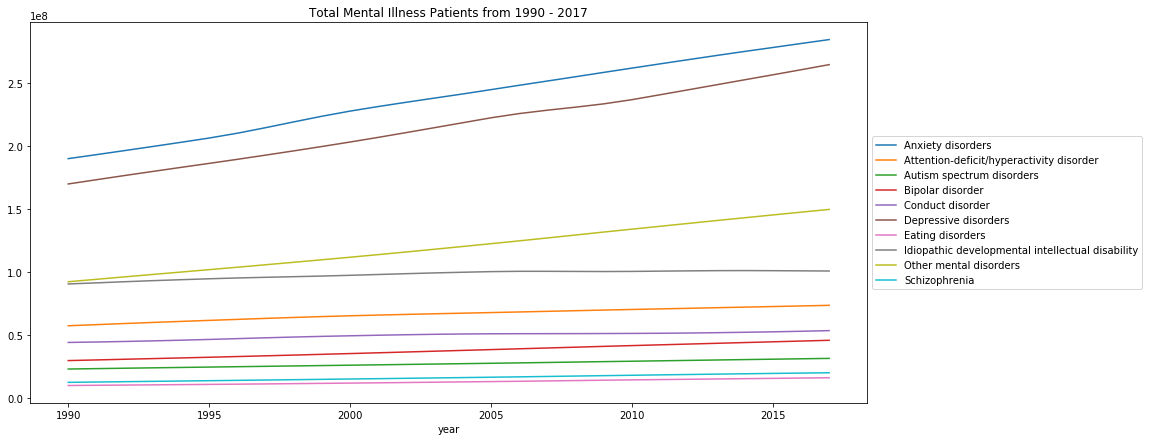

In [202]:
fig, ax = plt.subplots(figsize=(15,7))
filtered_data.groupby(['year', 'cause_name'])['val'].sum().unstack().plot(ax=ax)
#ax.set_yscale("log", nonposx='clip')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Total Mental Illness Patients from 1990 - 2017")

In [117]:
prevalence_min_level_number.groupby(['cause_name'])['val'].sum()

cause_name
Anxiety disorders                                   2.357774e+10
Attention-deficit/hyperactivity disorder            7.463212e+09
Autism spectrum disorders                           2.808365e+09
Bipolar disorder                                    3.641808e+09
Conduct disorder                                    6.597216e+09
Depressive disorders                                2.010982e+10
Eating disorders                                    1.246638e+09
Idiopathic developmental intellectual disability    1.061887e+10
Other mental disorders                              1.074322e+10
Schizophrenia                                       1.387049e+09
Name: val, dtype: float64

We observe that from 1990 - 2017, anxiety disorders and depressive disorders have shown the highest growth in terms of absolute number of people who suffer from the illness, followed by other mental disorders.

### Mental Illness Prevalence by Geographic Region

In [221]:
# Take a look at all the unique locations
# print(prevalence_percent.location_name.unique())

# Some locations overlap and not all locations are available, so let's just pick a few major continents we are interested in
location_list = ['Asia', 'Europe', 'Africa', 'America', 'Oceania']

# Filter prevalence percent data
filtered_data = prevalence_percent[(prevalence_percent.location_name.isin(location_list)) & 
                                   (prevalence_percent.cause_name.isin(level_1)) &
                                   (prevalence_percent.sex_name == 'Both') &
                                   (prevalence_percent.year == 2017) &
                                   (prevalence_percent.age_name == 'All Ages')]

In [241]:
continent_mental_illness = filtered_data.groupby(['location_name'])['val'].mean().reset_index()

# Change America to North America
continent_mental_illness.at[1, 'location_name'] = 'North America'

# Add South America where values are the same as America
continent_mental_illness.loc[5] = ['South America', 0.146731]

continent_mental_illness.columns = ['continent', 'percentage']
continent_mental_illness

,continent,percentage
0,Africa,0.118427
1,North America,0.146731
2,Asia,0.130268
3,Europe,0.142308
4,Oceania,0.105829
5,South America,0.146731


In [249]:
import json
import folium
continents = json.load(open(r'world-continents.json'))

In [250]:
continents

{'type': 'Topology',
 'transform': {'scale': [0.007898374251299942, 0.003946132450970359],
  'translate': [-180, -55.91391747071693]},
 'arcs': [[[14099, 282],
   [-54, -37],
   [-92, 40],
   [-56, -17],
   [-184, 63],
   [-4, 51],
   [90, -11],
   [19, 33],
   [100, 18],
   [-8, 129],
   [98, 55],
   [-40, 42],
   [-74, -26],
   [-27, 38],
   [113, 203],
   [56, -44],
   [50, 32],
   [60, -108],
   [36, -157],
   [87, -115],
   [103, -104],
   [81, -46],
   [87, 2],
   [-22, -70],
   [-80, 3],
   [-73, -37],
   [-62, 37],
   [-204, 26]],
  [[15421, 5947],
   [7, -153],
   [-30, -6],
   [-21, -154],
   [21, -128],
   [-17, -63],
   [46, -80],
   [80, -67],
   [47, -119],
   [-26, -62],
   [13, -112],
   [70, -57],
   [4, -115],
   [-49, -143],
   [-58, -116],
   [-10, -71],
   [-71, -70],
   [-115, -67],
   [-229, -72],
   [-82, -9],
   [-65, 19],
   [-42, -42],
   [38, -87],
   [-7, -95],
   [-25, -12],
   [-22, -115],
   [33, -85],
   [-14, -54],
   [-96, -72],
   [-86, -1],
   [-148

In [251]:
# Plot the map
world_map = folium.Map(location=[46.8182, 8.2275], tiles='cartodbpositron', zoom_start=1)

world_map.choropleth(geo_data=continents,
                     data=continent_mental_illness,
                     topojson='objects.continent',
                     columns=['continent', 'percentage'],
                     key_on='feature.id',
                     fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
                     legend_name='Mental Illness Prevalence (%)')

world_map

### Mental Illness Prevalence by Age

In [174]:
ages_in_order = ['1 to 4', '5 to 9', '10 to 14', '15 to 19', '20 to 24', '25 to 29',
       '30 to 34', '35 to 39', '40 to 44', '45 to 49', '50 to 54',
       '55 to 59', '60 to 64', '65 to 69', '70 to 74', '75 to 79', '80 to 84', '85 to 89',
       '90 to 94', '95 plus']

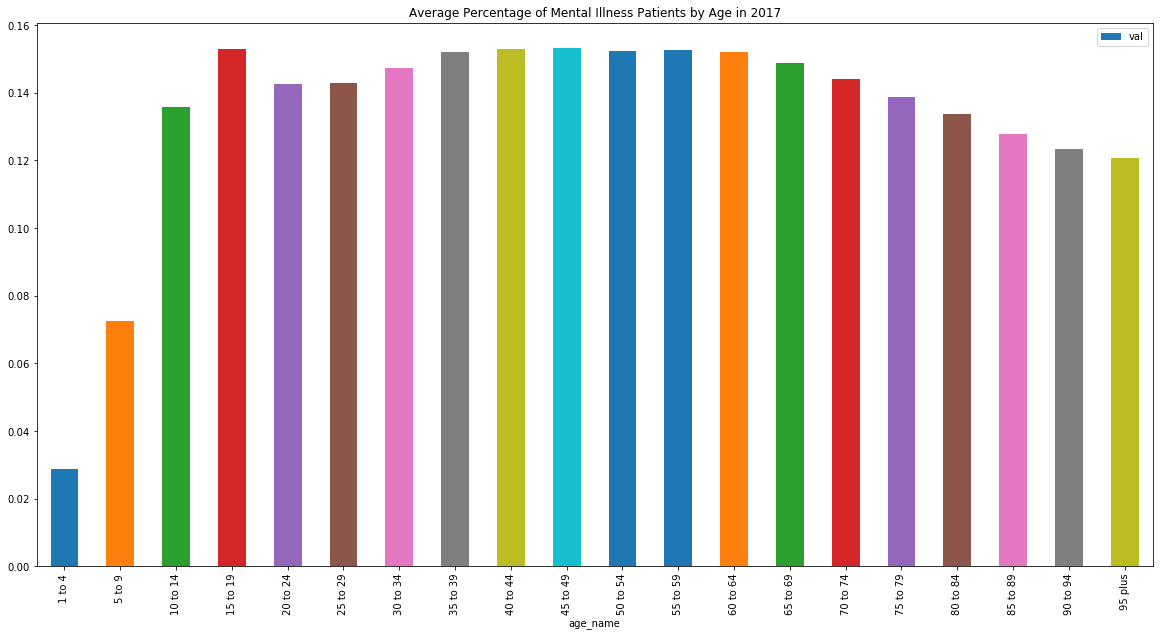

In [205]:
filtered_data = prevalence_percent[(prevalence_percent.location_name == 'Global') & 
                                   (prevalence_percent.cause_name.isin(level_1)) &
                                   (prevalence_percent.sex_name == 'Both') &
                                   (prevalence_percent.year == 2017)]

age_data = filtered_data[filtered_data.age_name.isin(ages_in_order)]
age_data = age_data.groupby(['age_name'])['val'].mean().reset_index()

mapping = {day: i for i, day in enumerate(ages_in_order)}
key = age_data['age_name'].map(mapping)
age_data = age_data.iloc[key.argsort()]

age_data.plot.bar(x='age_name', y='val', figsize=(20,10), title="Average Percentage of Mental Illness Patients by Age in 2017")

Based on the above graph, mental illness peaks during the ages of 15-19, which is often when a person is in high-school, or just beginning university/college. It is possible that the stress of living away from home for the first time or high school drama could be factors that contribute to such a high mental illness percentage. Middle ages from 35 - 65 also show a steady high mental illness prevalence percentage, and this percentage slowly decreases as a person reaches later stages of their life. Mental illness is lowest during the ages of 1-10, which makes sense because people are less stressed and have fewer responsibilities as a child. 